New York City Airbnb Open Data

Airbnb listings and metrics in NYC, NY, USA (2019)

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


In [ ]:
!pip3 install plotly==4.8
!pip3 install swifter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive')

['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash-0']

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/AB_NYC_2019.csv'

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import swifter

df = pd.read_csv(file_path)

In [ ]:
df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [ ]:
df['host_id'].nunique()

37457

In [ ]:
df[df['host_id'].duplicated()]  #some hosts have several listings

id  ... availability_365
22         8025  ...              364
23         8110  ...              304
33         9783  ...              359
35        10962  ...              340
39        12048  ...              188
...         ...  ...              ...
48887  36483152  ...              365
48889  36484363  ...              163
48890  36484665  ...                9
48891  36485057  ...               36
48893  36485609  ...                2

[11438 rows x 16 columns]

In [ ]:
df[df['host_id']==22486]  #eg. this host has 6 listings

id  ... availability_365
21      8024  ...              347
22      8025  ...              364
23      8110  ...              304
476   167222  ...              258
588   222054  ...              342
1783  801626  ...               89

[6 rows x 16 columns]

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe() #pay attention to price max min, look for outliers

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [ ]:
df.corr()

id  ...  availability_365
id                              1.000000  ...          0.085468
host_id                         0.588290  ...          0.203492
latitude                       -0.003125  ...         -0.010983
longitude                       0.090908  ...          0.082731
price                           0.010619  ...          0.081829
minimum_nights                 -0.013224  ...          0.144303
number_of_reviews              -0.319760  ...          0.172028
reviews_per_month               0.291828  ...          0.185791
calculated_host_listings_count  0.133272  ...          0.225701
availability_365                0.085468  ...          1.000000

[10 rows x 10 columns]

In [ ]:
df.price.sort_values(ascending=True).unique()

array([    0,    10,    11,    12,    13,    15,    16,    18,    19,
          20,    21,    22,    23,    24,    25,    26,    27,    28,
          29,    30,    31,    32,    33,    34,    35,    36,    37,
          38,    39,    40,    41,    42,    43,    44,    45,    46,
          47,    48,    49,    50,    51,    52,    53,    54,    55,
          56,    57,    58,    59,    60,    61,    62,    63,    64,
          65,    66,    67,    68,    69,    70,    71,    72,    73,
          74,    75,    76,    77,    78,    79,    80,    81,    82,
          83,    84,    85,    86,    87,    88,    89,    90,    91,
          92,    93,    94,    95,    96,    97,    98,    99,   100,
         101,   102,   103,   104,   105,   106,   107,   108,   109,
         110,   111,   112,   113,   114,   115,   116,   117,   118,
         119,   120,   121,   122,   123,   124,   125,   126,   127,
         128,   129,   130,   131,   132,   133,   134,   135,   136,
         137,   138,

In [ ]:
df.nunique() #id has same number as rows, all listings are unique
#host_id is less than listings, some hosts have more than one listing.

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df = df.drop(columns = ['id','name'],axis = 1)
#keep host_id to know which host is most popular and has best review
#host_id is a more accurate indicator than host_name because some names may be common

In [ ]:
df

host_id  ... availability_365
0          2787  ...              365
1          2845  ...              355
2          4632  ...              365
3          4869  ...              194
4          7192  ...                0
...         ...  ...              ...
48890   8232441  ...                9
48891   6570630  ...               36
48892  23492952  ...               27
48893  30985759  ...                2
48894  68119814  ...               23

[48895 rows x 14 columns]

In [ ]:
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.nunique()

host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df.neighbourhood_group.value_counts()
#find out why manhattan has more listings

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Willowbrook              1
New Dorp                 1
Woodrow                  1
Rossville                1
Richmondtown             1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
df['reviews_per_month'].fillna(0,inplace=True)
df

host_id  ... availability_365
0          2787  ...              365
1          2845  ...              355
2          4632  ...              365
3          4869  ...              194
4          7192  ...                0
...         ...  ...              ...
48890   8232441  ...                9
48891   6570630  ...               36
48892  23492952  ...               27
48893  30985759  ...                2
48894  68119814  ...               23

[48895 rows x 14 columns]

In [ ]:
#check for price outliers

fig = px.box(df, y = 'price')
fig.show()

In [ ]:
#check with histogram
fig = px.histogram(df,x='price',nbins=1000)
fig.show()

In [ ]:
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
lower_limit = df['price'].quantile(0.25) - IQR*1.5
upper_limit = df['price'].quantile(0.75) + IQR*1.5
print(f'lower limit:{lower_limit},upper limit:{upper_limit}')

lower limit:-90.0,upper limit:334.0


In [ ]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df[['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
                    'longitude', 'room_type', 'price', 'minimum_nights',
                    'number_of_reviews', 'last_review', 'reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']].corr()

host_id  ...  availability_365
host_id                         1.000000  ...          0.203492
latitude                        0.020224  ...         -0.010983
longitude                       0.127055  ...          0.082731
price                           0.015309  ...          0.081829
minimum_nights                 -0.017364  ...          0.144303
number_of_reviews              -0.140106  ...          0.172028
reviews_per_month               0.209783  ...          0.163732
calculated_host_listings_count  0.154950  ...          0.225701
availability_365                0.203492  ...          1.000000

[9 rows x 9 columns]

In [ ]:
#heatmap to check corr
fig = px.imshow(df[['host_id', 'latitude',
                    'longitude', 'price', 'minimum_nights',
                    'number_of_reviews','reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']].corr(),
                x = ['host_id', 'latitude',
                    'longitude', 'price', 'minimum_nights',
                    'number_of_reviews','reviews_per_month',
                    'calculated_host_listings_count', 'availability_365'],
                y = ['host_id', 'latitude',
                    'longitude', 'price', 'minimum_nights',
                    'number_of_reviews','reviews_per_month',
                    'calculated_host_listings_count', 'availability_365'],
                   color_continuous_scale = 'agsunset'
              )
fig.show()

In [ ]:
#check for duplicated data
df[df.duplicated()]

Empty DataFrame
Columns: [host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

In [ ]:
df = df[(df['price']>=lower_limit) & (df['price']<=upper_limit) & (df['price']>0)] #impossible to have price equal to zero
df

host_id  ... availability_365
0          2787  ...              365
1          2845  ...              355
2          4632  ...              365
3          4869  ...              194
4          7192  ...                0
...         ...  ...              ...
48890   8232441  ...                9
48891   6570630  ...               36
48892  23492952  ...               27
48893  30985759  ...                2
48894  68119814  ...               23

[45912 rows x 14 columns]

In [ ]:
#check if outliers are removed
fig = px.histogram(df,x='price',nbins=1000)
fig.show()

In [ ]:
#check if outliers are removed
fig = px.box(df, y = 'price')
fig.show()

In [ ]:
#check
df[df.minimum_nights==0]

Empty DataFrame
Columns: [host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

In [ ]:
#check
df[(df['number_of_reviews']==0) & (df['reviews_per_month']!=0)]

Empty DataFrame
Columns: [host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

In [ ]:
#check how many rows
df.shape
#still more than 30000 entries

(45912, 14)

In [ ]:
df.head()

host_id    host_name  ... calculated_host_listings_count availability_365
0     2787         John  ...                              6              365
1     2845     Jennifer  ...                              2              355
2     4632    Elisabeth  ...                              1              365
3     4869  LisaRoxanne  ...                              1              194
4     7192        Laura  ...                              1                0

[5 rows x 14 columns]

In [ ]:
df_neighbourhood_group_mean = df.groupby('neighbourhood_group').mean().reset_index()
df_neighbourhood_group_mean

neighbourhood_group  ...  availability_365
0               Bronx  ...        164.599626
1            Brooklyn  ...         98.484335
2           Manhattan  ...        105.889567
3              Queens  ...        143.019041
4       Staten Island  ...        199.893151

[5 rows x 10 columns]

In [ ]:
fig=px.bar(df_neighbourhood_group_mean, x='neighbourhood_group', y='price',color='neighbourhood_group')
fig.show()

In [ ]:
df_neighbourhood_mean = df.groupby('neighbourhood').mean().reset_index()
fig = px.bar(df_neighbourhood_mean.nlargest(15,'price'), x = 'neighbourhood', y = 'price', color = 'neighbourhood')
fig.show()

In [ ]:
#top 5 most expensive
df.nlargest(5,'price')

host_id   host_name  ... calculated_host_listings_count availability_365
2158      412783        Nick  ...                              1              238
38683  107434423  Blueground  ...                            232              310
38688  107434423  Blueground  ...                            232              296
38782  107434423  Blueground  ...                            232              280
43351  107434423  Blueground  ...                            232              311

[5 rows x 14 columns]

In [ ]:
#top 5 cheapest
df.nsmallest(5,'price')

host_id host_name  ... calculated_host_listings_count availability_365
2860    2196224     Sally  ...                              4              137
21700  33511962    Morgan  ...                              1                0
22261  62685070     Katie  ...                              1                0
22287  84497333  Jennifer  ...                              1                0
22835  97001292     Maria  ...                              1              252

[5 rows x 14 columns]

In [ ]:
df_room_type_mean = df.groupby('room_type').mean().reset_index()

fig = px.bar(df_room_type_mean, x = 'room_type', y = 'price', color = 'room_type')
fig.show()

In [ ]:
fig = px.bar(df.groupby(['room_type','neighbourhood_group']).mean().reset_index(), x = 'neighbourhood_group', y = 'price', color = 'room_type',barmode='group')
fig.show()

In [ ]:
df_nbhgrp_nbh_mean = df.groupby(['neighbourhood_group','neighbourhood']).mean().reset_index()
top5_expensive = df_nbhgrp_nbh_mean.sort_values(by='price',ascending=False)[:5]
top5_expensive

neighbourhood_group  ... availability_365
218       Staten Island  ...       351.000000
163              Queens  ...       179.500000
134              Queens  ...       100.333333
121           Manhattan  ...       112.112150
115           Manhattan  ...        98.054545

[5 rows x 11 columns]

In [ ]:
fig = px.bar(top5_expensive, x = 'neighbourhood', y='price',color = 'neighbourhood')
fig.show()

In [ ]:
#which host charges the most
df_host_mean = df.groupby(['host_id']).mean().reset_index()
df_host_mean_top15 = df_host_mean.nlargest(15,'price')
df_host_mean_top15
#check why these place ex, near to tourist attractions? train station? 

host_id  latitude  ...  calculated_host_listings_count  availability_365
1147      412783  40.73506  ...                             1.0             238.0
495       148108  40.72297  ...                             2.0              62.0
7085     4876826  40.76591  ...                             1.0             110.0
18328   29065752  40.71863  ...                             1.0             365.0
19868   35635299  40.74353  ...                             1.0             210.0
24465   62031986  40.75237  ...                             1.0             323.0
30321  152747338  40.74674  ...                             1.0             365.0
33119  224001464  40.73734  ...                             1.0              80.0
35124  269146714  40.73670  ...                             1.0             336.0
31641  184520918  40.74575  ...                             1.0             361.0
4912     2938302  40.73474  ...                             1.0             189.0
833       283215  40.72582  ...                             1.0              19.0
1639      707534  40.75462  ...                             1.0               5.0
3158     1602568  40.70934  ...                             1.0               0.0
3279     1679702  40.72634  ...                             1.0               0.0

[15 rows x 9 columns]

In [ ]:
#which host charges the least
df_host_mean = df.groupby(['host_id']).mean().reset_index()
df_host_mean_top15cheapest = df_host_mean.nsmallest(15,'price')
df_host_mean_top15cheapest

host_id  latitude  ...  calculated_host_listings_count  availability_365
1550      647528  40.69508  ...                             1.0               0.0
12019   11967922  40.72421  ...                             1.0              32.0
19352   33511962  40.81302  ...                             1.0               0.0
22278   47336995  40.75812  ...                             1.0               0.0
23475   52777892  40.76844  ...                             1.0               0.0
24529   62685070  40.69974  ...                             1.0               0.0
26490   84497333  40.72237  ...                             1.0               0.0
26917   91034542  40.74408  ...                             1.0               2.0
27294   97001292  40.69085  ...                             1.0             252.0
28125  110049861  40.70959  ...                             1.0              83.0
31085  167570251  40.66242  ...                             1.0               4.0
31519  180661875  40.76844  ...                             1.0               0.0
32074  197169969  40.68939  ...                             1.0             332.0
32375  205820814  40.83454  ...                             1.0             180.0
35064  268138154  40.69640  ...                             1.0               0.0

[15 rows x 9 columns]

In [ ]:
#min nights at each neighbourhood group
df_neighbourhood_group_mean
fig = px.bar(df_neighbourhood_group_mean, x = 'neighbourhood_group', y='minimum_nights',color = 'neighbourhood_group')
fig.show()

In [ ]:
#min nights of each room type
df_room_type_mean
fig = px.bar(df_room_type_mean, x = 'room_type', y='minimum_nights',color = 'room_type')
fig.show()

In [ ]:
#room type and neighbourhood group vs min nights
fig = px.bar(df.groupby(['room_type','neighbourhood_group']).mean().reset_index(), x = 'neighbourhood_group', y = 'minimum_nights', color = 'room_type',barmode='group')
fig.show()

In [ ]:
#which neighbourhood groups have most listings
df_no_of_listings=df['neighbourhood_group'].value_counts().reset_index()
fig = px.bar(df_no_of_listings, x = 'index', y='neighbourhood_group',color = 'index',labels={'index':'neighbourhood_group','neighbourhood_group':'number of listings'})
fig.show()

In [ ]:
#check reviews distribution
fig = px.box(df, y = 'reviews_per_month')
fig.show()

In [ ]:
#reviews per month and neighbourhood group
fig = px.bar(df.groupby('neighbourhood_group').mean().reset_index(), x = 'neighbourhood_group', y = 'reviews_per_month', color = 'neighbourhood_group')
fig.show()

In [ ]:
#reviews per month and room type
fig = px.bar(df.groupby('room_type').mean().reset_index(), x = 'room_type', y = 'reviews_per_month', color = 'room_type')
fig.show()

In [ ]:
#reviews per month
fig = px.bar(df.groupby(['neighbourhood_group','room_type']).mean().reset_index(), x = 'neighbourhood_group', y = 'reviews_per_month', color = 'room_type',barmode='group')
fig.show()

In [ ]:
#top 10 listings with most reviews per month
df_top10_rpm= df.sort_values(by='reviews_per_month',ascending=False)[:10]
df_top10_rpm[['neighbourhood_group','neighbourhood','room_type','price','reviews_per_month']]

neighbourhood_group        neighbourhood  ... price  reviews_per_month
42075           Manhattan     Theater District  ...   100              58.50
42076           Manhattan     Theater District  ...   199              27.95
38870              Queens             Rosedale  ...    45              20.94
27287              Queens  Springfield Gardens  ...    80              19.75
28651              Queens  Springfield Gardens  ...    50              17.82
29628              Queens  Springfield Gardens  ...    50              16.81
20403              Queens        East Elmhurst  ...    48              16.22
22469              Queens        East Elmhurst  ...    48              16.03
36238              Queens  Springfield Gardens  ...    75              15.78
40297              Queens              Jamaica  ...    67              15.32

[10 rows x 5 columns]

In [ ]:
#top 10 listings with most reviews cumulative
df_top10_cum_reviews = df.sort_values(by='number_of_reviews',ascending=False)[:10]
df_top10_cum_reviews[['neighbourhood_group','neighbourhood','room_type','price','number_of_reviews']]

neighbourhood_group    neighbourhood  ... price  number_of_reviews
11759              Queens          Jamaica  ...    47                629
2031            Manhattan           Harlem  ...    49                607
2030            Manhattan           Harlem  ...    49                597
2015            Manhattan           Harlem  ...    49                594
13495              Queens          Jamaica  ...    47                576
10623              Queens    East Elmhurst  ...    46                543
1879            Manhattan  Lower East Side  ...    99                540
20403              Queens    East Elmhurst  ...    48                510
4870             Brooklyn       Park Slope  ...   160                488
471              Brooklyn         Bushwick  ...    60                480

[10 rows x 5 columns]

In [ ]:
#avail vs neighbourhood group
fig=px.bar(df_neighbourhood_group_mean, x='neighbourhood_group', y='availability_365',color='neighbourhood_group')
fig.show()

In [ ]:
df.head(3)

host_id  host_name  ... calculated_host_listings_count availability_365
0     2787       John  ...                              6              365
1     2845   Jennifer  ...                              2              355
2     4632  Elisabeth  ...                              1              365

[3 rows x 14 columns]

In [ ]:
fig = px.scatter(df, x ='longitude', y ='latitude', color = 'neighbourhood_group')
fig.show()

In [ ]:
fig = px.scatter(df, x ='longitude', y ='latitude', color = 'price')
fig.show()

In [ ]:
fig = px.scatter(df, x ='longitude', y ='latitude', color = 'room_type')
fig.show()

In [ ]:
fig = px.scatter(df, x ='longitude', y ='latitude', color = 'availability_365')
fig.show()

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread

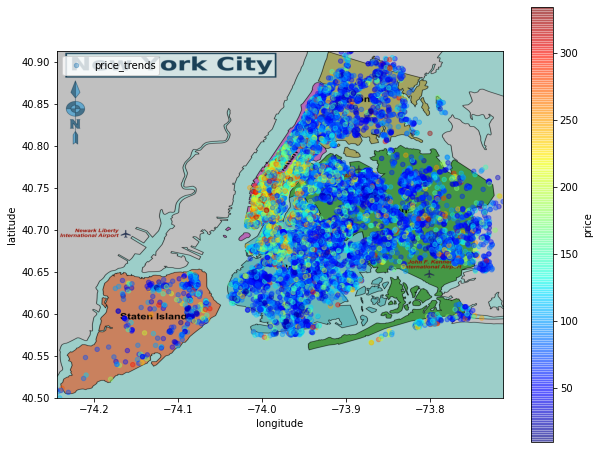

In [ ]:
plt.figure(figsize=(10,7))
img=imread('/content/drive/MyDrive/Colab Notebooks/New_York_City_District_Map.png')
plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

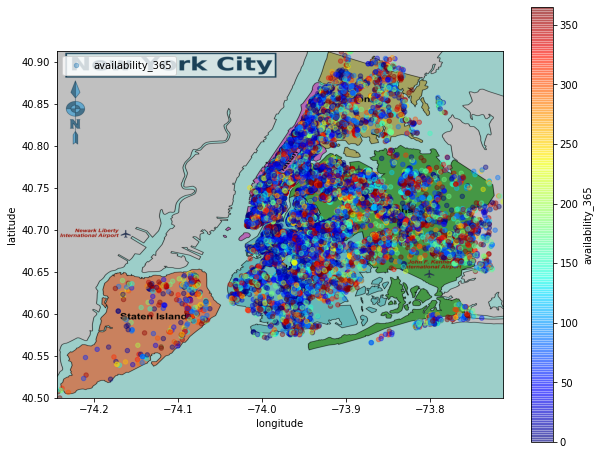

In [ ]:
plt.figure(figsize=(10,7))
img=imread('/content/drive/MyDrive/Colab Notebooks/New_York_City_District_Map.png')
plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='availability_365',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

In [ ]:
#45,000 dataset export to csv
#business understanding, problems to solve